In [47]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle5 as pickle

# magic word for producing visualizations in notebook
%matplotlib inline

## EDA 

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

## First glance at the data

In [2]:
# load in the demographics data for the general population of Germany
azdias = pd.read_csv('../data/Udacity_AZDIAS_052018.csv')

/Users/bernardogarcia/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# load in the demographics data for customers of a mail-order company
customers = pd.read_csv('../data/Udacity_CUSTOMERS_052018.csv')

Columns 19: `CAMEO_DEUG_2015` and 20: `CAMEO_INTL_2015` have mixed datatypes.

In [4]:
azdias.iloc[:, 19].value_counts()

8      78023
9      62578
6      61253
4      60185
8.0    56418
3      50360
2      48276
9.0    45599
7      45021
6.0    44621
4.0    43727
3.0    36419
2.0    34955
7.0    32912
5      32292
5.0    23018
1      20997
1.0    15215
X        373
Name: CAMEO_DEUG_2015, dtype: int64

In [5]:
customers.iloc[:, 19].value_counts()

2      17574
4      16458
6      14008
3      13585
1      12498
8       9716
5       8624
7       7878
2.0     5910
4.0     5606
3.0     4805
9       4731
6.0     4709
1.0     4280
8.0     3333
5.0     3042
7.0     2680
9.0     1661
X        126
Name: CAMEO_DEUG_2015, dtype: int64

Col 19 has intengers, floats and one string ('X'). I will load this column as an object type and then pre-process it.

In [6]:
azdias.iloc[:, 20].value_counts()

51      77576
51.0    56118
41      53459
24      52882
41.0    38877
24.0    38276
14      36524
43      32730
14.0    26360
54      26207
43.0    23942
25      22837
54.0    19184
22      19173
25.0    16791
23      15653
13      15272
45      15206
22.0    13982
55      13842
52      11836
23.0    11097
13.0    11064
31      11041
45.0    10926
34      10737
55.0    10113
15       9832
52.0     8706
44       8543
31.0     7983
34.0     7787
12       7645
15.0     7142
44.0     6277
35       6090
32       6067
33       5833
12.0     5604
32.0     4287
35.0     4266
33.0     4102
XX        373
Name: CAMEO_INTL_2015, dtype: int64

In [7]:
customers.iloc[:, 20].value_counts()

14      14708
24      13301
41       8461
43       7158
25       6900
15       6845
51       5987
13       5728
22       5566
14.0     4939
24.0     4504
23       4276
34       3945
45       3936
54       3537
41.0     2859
55       2794
12       2791
43.0     2476
25.0     2472
15.0     2372
44       2144
51.0     2126
31       2050
13.0     1955
22.0     1941
35       1741
23.0     1494
34.0     1423
45.0     1352
54.0     1258
32       1256
33       1178
12.0      924
55.0      920
52        770
44.0      688
31.0      681
35.0      553
32.0      440
33.0      396
52.0      253
XX        126
Name: CAMEO_INTL_2015, dtype: int64

Col 20 has intengers, floats and one string ('XX'). I will load this column as an object type and then pre-process it.

In [8]:
# re-load in azdias and customers data with cols 19 & 20 as object type
azdias = pd.read_csv('../data/Udacity_AZDIAS_052018.csv', dtype={'CAMEO_DEUG_2015': 'str', 'CAMEO_INTL_2015': 'str'})
customers = pd.read_csv('../data/Udacity_CUSTOMERS_052018.csv', dtype={'CAMEO_DEUG_2015': 'str', 'CAMEO_INTL_2015': 'str'})

### Explore AZDIAS dataframe

In [9]:
azdias.head()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [10]:
def drop_unnamed(df):
    """It drops unnamed col."""
    return df.drop('Unnamed: 0', axis=1)

In [11]:
azdias = drop_unnamed(azdias)
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


**Missing Values**

In [12]:
def check_mv_prop(df, p):
    """It checks the proportion of missing values for each col and prints which cols have more than p% missing values.
    INPUT:
    df: Pandas dataframe.
    p: float. Missing values proportion threshold.
    
    OUTPUT:
    None
    """
    mvs = df.isnull().sum()
    for col in df.columns:
        if mvs.loc[col] / df.shape[0] > p:
            print("{:.2f}% of {} are missing values".format((df.isnull().sum().loc[col] / df.shape[0])*100, col))

In [13]:
# check features with more than 50% of mv
check_mv_prop(azdias, 0.5)

90.90% of ALTER_KIND1 are missing values
96.69% of ALTER_KIND2 are missing values
99.31% of ALTER_KIND3 are missing values
99.86% of ALTER_KIND4 are missing values
73.40% of EXTSEL992 are missing values
65.60% of KK_KUNDENTYP are missing values


`ALTER_KIND1`, `ALTER_KIND2`, `ALTER_KIND3` and `ALTER_KIND4` do not appear in the DIAS Information Levels - Attributes 2017 spreadsheet and almost all the instances are missing values so I will drop these columns.

`EXTSEL992EXTSEL992` and `KK_KUNDENTYP` has lots of missing values and do not appear in the DIAS Information Levels - Attributes 2017 spreadsheet either so these cols will be dropped as well.

**I will incorporate all these steps into a cleaning function later on.**

In [14]:
# check features with mv
check_mv_prop(azdias, 0.0)

8.25% of AKT_DAT_KL are missing values
8.25% of ALTER_HH are missing values
90.90% of ALTER_KIND1 are missing values
96.69% of ALTER_KIND2 are missing values
99.31% of ALTER_KIND3 are missing values
99.86% of ALTER_KIND4 are missing values
29.50% of ALTERSKATEGORIE_FEIN are missing values
10.45% of ANZ_HAUSHALTE_AKTIV are missing values
10.88% of ANZ_HH_TITEL are missing values
8.25% of ANZ_KINDER are missing values
8.25% of ANZ_PERSONEN are missing values
10.45% of ANZ_STATISTISCHE_HAUSHALTE are missing values
8.25% of ANZ_TITEL are missing values
10.91% of ARBEIT are missing values
10.52% of BALLRAUM are missing values
11.11% of CAMEO_DEU_2015 are missing values
11.11% of CAMEO_DEUG_2015 are missing values
11.11% of CAMEO_INTL_2015 are missing values
0.54% of CJT_GESAMTTYP are missing values
0.54% of CJT_KATALOGNUTZER are missing values
0.54% of CJT_TYP_1 are missing values
0.54% of CJT_TYP_2 are missing values
0.54% of CJT_TYP_3 are missing values
0.54% of CJT_TYP_4 are missing valu

11.87% of KBA13_KW_40 are missing values
11.87% of KBA13_KW_50 are missing values
11.87% of KBA13_KW_60 are missing values
11.87% of KBA13_KW_61_120 are missing values
11.87% of KBA13_KW_70 are missing values
11.87% of KBA13_KW_80 are missing values
11.87% of KBA13_KW_90 are missing values
11.87% of KBA13_MAZDA are missing values
11.87% of KBA13_MERCEDES are missing values
11.87% of KBA13_MOTOR are missing values
11.87% of KBA13_NISSAN are missing values
11.87% of KBA13_OPEL are missing values
11.87% of KBA13_PEUGEOT are missing values
11.87% of KBA13_RENAULT are missing values
11.87% of KBA13_SEG_GELAENDEWAGEN are missing values
11.87% of KBA13_SEG_GROSSRAUMVANS are missing values
11.87% of KBA13_SEG_KLEINST are missing values
11.87% of KBA13_SEG_KLEINWAGEN are missing values
11.87% of KBA13_SEG_KOMPAKTKLASSE are missing values
11.87% of KBA13_SEG_MINIVANS are missing values
11.87% of KBA13_SEG_MINIWAGEN are missing values
11.87% of KBA13_SEG_MITTELKLASSE are missing values
11.87% of 

The majority of the features with missing values have up to 10-15% of mv. As a first approach, I am going to imput them with the **mode** because all the features are categorical indicating some kind of classification. A large number of them are ordinal variable already encoded.

**D19 features - Attributes names with the prefix D19_ seem to provide information about transactions.**

D19 variables with more than 10% of missing values have exactly 28.85% missing values, which is more than 10-15%.

In [15]:
azdias['D19_BANKEN_ONLINE_QUOTE_12'].value_counts().sort_index()

0.0     588874
1.0          2
2.0         35
3.0        220
4.0         18
5.0        391
6.0         50
7.0        214
8.0        172
9.0         67
10.0     44065
Name: D19_BANKEN_ONLINE_QUOTE_12, dtype: int64

This feature represents the amount of online transactions within all transactions in the segment bank. A prior, I can easily distinguish 2 groups of people by just looking at the values that the feature takes. People that do not make online-transactions and people who make 100% of online-transactions. This is probably an important feature for our analysis.

In [16]:
# check if all the mv in D19 features are in the same rows (are the same individuals)
d19_28_85_features = ['D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_KONSUMTYP',
                    'D19_LETZTER_KAUF_BRANCHE', 'D19_LOTTO', 'D19_SOZIALES', 'D19_TELKO_ONLINE_QUOTE_12',
                    'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSAND_ONLINE_QUOTE_12'
                     ]

azdias[azdias['D19_BANKEN_ONLINE_QUOTE_12'].isnull() == True][d19_28_85_features].isnull().all()

D19_BANKEN_ONLINE_QUOTE_12     True
D19_GESAMT_ONLINE_QUOTE_12     True
D19_KONSUMTYP                  True
D19_LETZTER_KAUF_BRANCHE       True
D19_LOTTO                      True
D19_SOZIALES                   True
D19_TELKO_ONLINE_QUOTE_12      True
D19_TELKO_ONLINE_QUOTE_12      True
D19_VERSAND_ONLINE_QUOTE_12    True
D19_VERSAND_ONLINE_QUOTE_12    True
dtype: bool

In [17]:
# spot check mv proportion
azdias['D19_BANKEN_ONLINE_QUOTE_12'].isnull().sum() / azdias.shape[0]

0.2884952217239046

These seem to be the same individuals that have some data missing. I will go for the same approach (imputing with the mode) at the moment.

**Data types**

In [18]:
azdias.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,798073.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,8.287263,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,15.628087,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,1.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,9.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,595.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


360 out of 366 columns are numerical data.

I have load cols `CAMEO_DEUG_2015` and `CAMEO_INTL_2015` as strings due to mixed data types so I need to convert them into numerical data.

I need to find the rest 4 columns that presumably have not been encoded yet and transform them.

In [19]:
# cols 19 and 20 subset
azdias_subset = azdias.iloc[:, 18:20]
azdias_subset

,CAMEO_DEUG_2015,CAMEO_INTL_2015
0,NaN,NaN
1,8.0,51.0
2,4.0,24.0
3,2.0,12.0
4,6.0,43.0
...,...,...
891216,7.0,41.0
891217,9.0,51.0
891218,4.0,24.0
891219,9.0,51.0


In [20]:
azdias_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   CAMEO_DEUG_2015  792242 non-null  object
 1   CAMEO_INTL_2015  792242 non-null  object
dtypes: object(2)
memory usage: 13.6+ MB


In [21]:
azdias_subset['CAMEO_DEUG_2015'].value_counts()

8      78023
9      62578
6      61253
4      60185
8.0    56418
3      50360
2      48276
9.0    45599
7      45021
6.0    44621
4.0    43727
3.0    36419
2.0    34955
7.0    32912
5      32292
5.0    23018
1      20997
1.0    15215
X        373
Name: CAMEO_DEUG_2015, dtype: int64

In [22]:
azdias_subset[azdias_subset['CAMEO_DEUG_2015'] == 'X']

,CAMEO_DEUG_2015,CAMEO_INTL_2015
2511,X,XX
4569,X,XX
9803,X,XX
16700,X,XX
16883,X,XX
...,...,...
868148,X,XX
874917,X,XX
882189,X,XX
882231,X,XX


In [23]:
azdias_subset['CAMEO_INTL_2015'].value_counts()

51      77576
51.0    56118
41      53459
24      52882
41.0    38877
24.0    38276
14      36524
43      32730
14.0    26360
54      26207
43.0    23942
25      22837
54.0    19184
22      19173
25.0    16791
23      15653
13      15272
45      15206
22.0    13982
55      13842
52      11836
23.0    11097
13.0    11064
31      11041
45.0    10926
34      10737
55.0    10113
15       9832
52.0     8706
44       8543
31.0     7983
34.0     7787
12       7645
15.0     7142
44.0     6277
35       6090
32       6067
33       5833
12.0     5604
32.0     4287
35.0     4266
33.0     4102
XX        373
Name: CAMEO_INTL_2015, dtype: int64

As I had already seen, there are a couple of weird values in the features (X and XX). I have looked at the feature values in *DIAS Attributes - Values 2017 spreadsheet* and these values are very likely to be **-1 or unknown**.

**I am going to represent this category with a 0 instead, and convert all the values into int.**

In [24]:
azdias.describe(exclude=np.number)

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
count,792242,792242,792242,634108,798073,798073
unique,45,19,43,35,5162,2
top,6B,8,51,D19_UNBEKANNT,1992-02-10 00:00:00,W
freq,56672,78023,77576,195338,383738,629528


In [25]:
# CAMEO_DEU_2015 values
azdias['CAMEO_DEU_2015'].value_counts().sort_index()

1A    10850
1B     4071
1C     4317
1D    11909
1E     5065
2A    13249
2B    15486
2C    19422
2D    35074
3A    10543
3B     7160
3C    34769
3D    34307
4A    33155
4B     9047
4C    47819
4D     8570
4E     5321
5A    12214
5B    10354
5C     9935
5D    14943
5E     3581
5F     4283
6A     6810
6B    56672
6C    14820
6D     6073
6E    16107
6F     5392
7A    34399
7B    24503
7C     9065
7D     5333
7E     4633
8A    52438
8B    33434
8C    30993
8D    17576
9A    20542
9B    27676
9C    24987
9D    28593
9E     6379
XX      373
Name: CAMEO_DEU_2015, dtype: int64

I need to encode this variable. *DIAS Attributes - Values 2017 spreadsheet* tells me this is a classification without an specific order so it is not ordinal data.

XX are missing values or represent unknwon as per the other CAMEO_ variables. I will assing them a 0 to follow the same approach.

To encode `CAMEO_DEU_2015`, I will use **label encoding.** `CAMEO_DEUG_2015` and `CAMEO_INTL_2015` are already encoded and just need to convert their data type to numeric.

In [26]:
# D19_LETZTER_KAUF_BRANCHE values
azdias['D19_LETZTER_KAUF_BRANCHE'].value_counts().sort_index()

D19_BANKEN_DIREKT          23273
D19_BANKEN_GROSS           10550
D19_BANKEN_LOKAL            1442
D19_BANKEN_REST             5247
D19_BEKLEIDUNG_GEH         10272
D19_BEKLEIDUNG_REST        21796
D19_BILDUNG                  980
D19_BIO_OEKO                1232
D19_BUCH_CD                28754
D19_DIGIT_SERV              3577
D19_DROGERIEARTIKEL        24072
D19_ENERGIE                12084
D19_FREIZEIT                7257
D19_GARTEN                  1646
D19_HANDWERK                2227
D19_HAUS_DEKO              20858
D19_KINDERARTIKEL           7301
D19_KOSMETIK                 805
D19_LEBENSMITTEL            6458
D19_LOTTO                    839
D19_NAHRUNGSERGAENZUNG      4061
D19_RATGEBER                4931
D19_REISEN                  3122
D19_SAMMELARTIKEL           2443
D19_SCHUHE                 32578
D19_SONSTIGE               44722
D19_TECHNIK                 7002
D19_TELKO_MOBILE           14447
D19_TELKO_REST             11472
D19_TIERARTIKEL             2578
D19_UNBEKA

This variable seems to be some kind of list of other D19 so **I will drop it.**

In [27]:
# EINGEFUEGT_AM values
azdias['EINGEFUEGT_AM'].value_counts().sort_index()

1991-06-17 00:00:00         1
1991-08-30 00:00:00         2
1992-02-10 00:00:00    383738
1992-02-12 00:00:00    192264
1992-02-19 00:00:00       317
                        ...  
2016-04-04 00:00:00         4
2016-04-14 00:00:00         2
2016-04-20 00:00:00        16
2016-05-02 00:00:00        15
2016-05-09 00:00:00         1
Name: EINGEFUEGT_AM, Length: 5162, dtype: int64

This is time data. There is not description for this feature in the attributes spreadsheets and it does not seem to add much value as the traslation from German is "Inserted AM". **I will drop it as well.**

In [28]:
# OST_WEST_KZ values
azdias['OST_WEST_KZ'].value_counts().sort_index()

O    168545
W    629528
Name: OST_WEST_KZ, dtype: int64

This feature is a flag indicating the former GDR/FRG.

*The German Democratic Republic, or GDR, also simply known as East Germany, was founded as a second German state on October 7, 1949 — four years after the end of World War II. The Federal Republic of Germany (FRG), or more commonly known as West Germany, was founded just four months prior.*

This is unlikely to be useful for the analysis so **I will drop it.**

### Explore CUSTOMERS dataframe

In [29]:
customers.head()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


As I already know, CUSTOMER has 3 columns more: `CUSTOMER_GROUP`, `ONLINE_PURCHASE`, and `PRODUCT_GROUP`.


In [30]:
customers[['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP']]

,CUSTOMER_GROUP,ONLINE_PURCHASE,PRODUCT_GROUP
0,MULTI_BUYER,0,COSMETIC_AND_FOOD
1,SINGLE_BUYER,0,FOOD
2,MULTI_BUYER,0,COSMETIC_AND_FOOD
3,MULTI_BUYER,0,COSMETIC
4,MULTI_BUYER,0,FOOD
...,...,...,...
191647,MULTI_BUYER,0,COSMETIC_AND_FOOD
191648,SINGLE_BUYER,0,COSMETIC
191649,MULTI_BUYER,0,COSMETIC_AND_FOOD
191650,SINGLE_BUYER,0,FOOD


I want to compare the customer group with the population of Germany by matching variables. Even though these features are not in the AZDIAS dataframe, they might be useful to cluster or current customers.

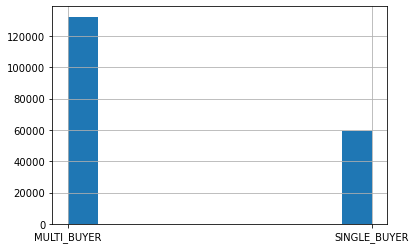

In [31]:
# visualize values
customers['CUSTOMER_GROUP'].hist();

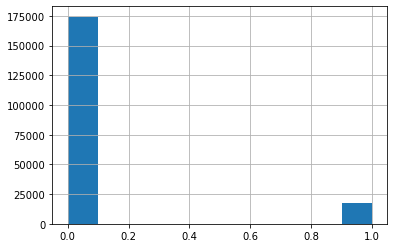

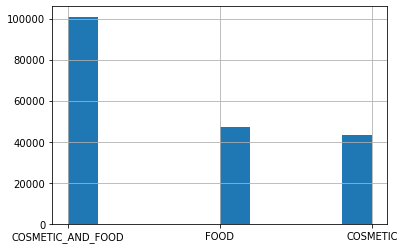

In [32]:
customers['ONLINE_PURCHASE'].hist()
plt.show()
customers['PRODUCT_GROUP'].hist();

This information might be useful in some fashion so I will label encode `CUSTOMER_GROUP` and `PRODUCT_GROUP`.

In [33]:
customers = drop_unnamed(customers)
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


**Missing values**

In [34]:
# check features with more than 50% of mv
check_mv_prop(customers, 0.5)

93.86% of ALTER_KIND1 are missing values
97.34% of ALTER_KIND2 are missing values
99.33% of ALTER_KIND3 are missing values
99.88% of ALTER_KIND4 are missing values
58.41% of KK_KUNDENTYP are missing values


As I expected, similar to AZDIAS with the exception of `EXTSEL992` column. **I will drop these features.**

In [35]:
# check features with mv
check_mv_prop(customers, 0.0)

24.31% of AKT_DAT_KL are missing values
24.31% of ALTER_HH are missing values
93.86% of ALTER_KIND1 are missing values
97.34% of ALTER_KIND2 are missing values
99.33% of ALTER_KIND3 are missing values
99.88% of ALTER_KIND4 are missing values
27.05% of ALTERSKATEGORIE_FEIN are missing values
26.05% of ANZ_HAUSHALTE_AKTIV are missing values
27.19% of ANZ_HH_TITEL are missing values
24.31% of ANZ_KINDER are missing values
24.31% of ANZ_PERSONEN are missing values
26.05% of ANZ_STATISTISCHE_HAUSHALTE are missing values
24.31% of ANZ_TITEL are missing values
26.34% of ARBEIT are missing values
26.07% of BALLRAUM are missing values
26.31% of CAMEO_DEU_2015 are missing values
26.31% of CAMEO_DEUG_2015 are missing values
26.31% of CAMEO_INTL_2015 are missing values
1.68% of CJT_GESAMTTYP are missing values
1.68% of CJT_KATALOGNUTZER are missing values
1.68% of CJT_TYP_1 are missing values
1.68% of CJT_TYP_2 are missing values
1.68% of CJT_TYP_3 are missing values
1.68% of CJT_TYP_4 are missing

26.76% of KBA13_KW_40 are missing values
26.76% of KBA13_KW_50 are missing values
26.76% of KBA13_KW_60 are missing values
26.76% of KBA13_KW_61_120 are missing values
26.76% of KBA13_KW_70 are missing values
26.76% of KBA13_KW_80 are missing values
26.76% of KBA13_KW_90 are missing values
26.76% of KBA13_MAZDA are missing values
26.76% of KBA13_MERCEDES are missing values
26.76% of KBA13_MOTOR are missing values
26.76% of KBA13_NISSAN are missing values
26.76% of KBA13_OPEL are missing values
26.76% of KBA13_PEUGEOT are missing values
26.76% of KBA13_RENAULT are missing values
26.76% of KBA13_SEG_GELAENDEWAGEN are missing values
26.76% of KBA13_SEG_GROSSRAUMVANS are missing values
26.76% of KBA13_SEG_KLEINST are missing values
26.76% of KBA13_SEG_KLEINWAGEN are missing values
26.76% of KBA13_SEG_KOMPAKTKLASSE are missing values
26.76% of KBA13_SEG_MINIVANS are missing values
26.76% of KBA13_SEG_MINIWAGEN are missing values
26.76% of KBA13_SEG_MITTELKLASSE are missing values
26.76% of 

On average, the proportion of missing values is larger in the CUSTOMERS dataframe than in the AZDIAS dataframe. As a first attempt, I am going to use the same approach (impute missing values with the mode) that for AZDIAS although the proportion is larger.

**Data types**

In [36]:
customers.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,145056.000000,145056.000000,11766.000000,5100.000000,1275.000000,236.000000,139810.000000,141725.000000,...,143781.000000,143781.000000,143781.000000,137910.000000,145056.000000,141725.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,95826.500000,0.344359,1.747525,11.352009,12.337243,13.672353,14.647059,15.377119,10.331579,4.965863,...,4.374417,4.564769,3.168868,4.152716,8.646371,3.723133,2.576806,0.090247,1.376432,3.060907
std,55325.311233,1.391672,1.966334,6.275026,4.006050,3.243335,2.753787,2.307653,4.134828,14.309694,...,2.924355,2.887035,2.233516,1.974375,1.154001,2.095540,1.168486,0.286536,0.484492,1.086254
min,1.000000,-1.000000,1.000000,0.000000,2.000000,2.000000,5.000000,8.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,47913.750000,-1.000000,1.000000,8.000000,9.000000,11.000000,13.000000,14.000000,9.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,9.000000,2.000000,1.000000,0.000000,1.000000,3.000000
50%,95826.500000,0.000000,1.000000,11.000000,13.000000,14.000000,15.000000,16.000000,10.000000,1.000000,...,4.000000,4.000000,3.000000,5.000000,9.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,143739.250000,2.000000,1.000000,16.000000,16.000000,16.000000,17.000000,17.000000,13.000000,4.000000,...,7.000000,7.000000,4.000000,6.000000,9.000000,5.000000,3.000000,0.000000,2.000000,4.000000
max,191652.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,523.000000,...,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,1.000000,2.000000,9.000000


Similar to AZDIAS, 360 + 1 (`ONLINE_PURCHASE`) features with numerical data.
Let's check that the cols with categorical data are the same as in AZDIAS df.

In [37]:
customers.describe(exclude=np.number)

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ,PRODUCT_GROUP,CUSTOMER_GROUP
count,141224,141224,141224,143955,141725,141725,191652,191652
unique,45,19,43,35,3034,2,3,2
top,2D,2,14,D19_UNBEKANNT,1992-02-10 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
freq,11208,17574,14708,31910,64744,130382,100860,132238


In [38]:
customers_cat = customers[['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
                         'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ',
                          'PRODUCT_GROUP', 'CUSTOMER_GROUP']]
customers_cat.head(10)

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ,PRODUCT_GROUP,CUSTOMER_GROUP
0,1A,1.0,13.0,D19_UNBEKANNT,1992-02-12 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
1,NaN,NaN,NaN,D19_BANKEN_GROSS,NaN,NaN,FOOD,SINGLE_BUYER
2,5D,5.0,34.0,D19_UNBEKANNT,1992-02-10 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
3,4C,4.0,24.0,D19_NAHRUNGSERGAENZUNG,1992-02-10 00:00:00,W,COSMETIC,MULTI_BUYER
4,7B,7.0,41.0,D19_SCHUHE,1992-02-12 00:00:00,W,FOOD,MULTI_BUYER
5,5D,5.0,34.0,D19_BUCH_CD,1992-02-10 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
6,3B,3.0,23.0,D19_DROGERIEARTIKEL,1992-02-10 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
7,1D,1.0,15.0,D19_SONSTIGE,1992-02-10 00:00:00,W,FOOD,SINGLE_BUYER
8,9E,9.0,55.0,D19_SONSTIGE,2004-10-14 00:00:00,W,COSMETIC,MULTI_BUYER
9,1D,1.0,15.0,D19_BUCH_CD,1997-07-14 00:00:00,W,COSMETIC,MULTI_BUYER


**CAMEO_ features** - Same approach as for AZDIAS. Re-use functions in data_preprocessing.py.

`D19_LETZTER_KAUF_BRANCHE`, `EINGEFUEGT_AM` and `OST_WEST_KZ` will be **dropped** as for AZDIAS.

`CUSTOMER_GROUP` and `PRODUCT_GROUP` will be **label encoded.**

In [40]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [45]:
def load_pickle(file_path):
    file = open(file_path,'rb')
    object_file = pickle.load(file)
    file.close()
    return object_file

In [48]:
exist = '<' in azdias

In [49]:
print(exist)

False


In [53]:
from pandas.api.types import infer_dtype
def is_mixed(col):
    return infer_dtype(col) in ['mixed', 'mixed-integer']

In [62]:
azdias.apply(is_mixed)[azdias.apply(is_mixed) == True]

Series([], dtype: bool)

In [64]:
list(azdias.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('in

In [74]:
azdias[azdias['CAMEO_DEUG_2015'] == 'X'].loc[:, 'CAMEO_DEUG_2015']

2511      X
4569      X
9803      X
16700     X
16883     X
         ..
868148    X
874917    X
882189    X
882231    X
884998    X
Name: CAMEO_DEUG_2015, Length: 373, dtype: object

In [75]:
azdias.loc[azdias['CAMEO_DEUG_2015'] == 'X', 'CAMEO_DEUG_2015']

2511      X
4569      X
9803      X
16700     X
16883     X
         ..
868148    X
874917    X
882189    X
882231    X
884998    X
Name: CAMEO_DEUG_2015, Length: 373, dtype: object